# Analyse your Stackoverflow reputation and predict your rep. in November 2016

### Load Stackoverflow rep file
This can be found at: http://stackoverflow.com/reputation

In [1]:
# read the file into a single string
with open('data/stack-reputation.txt', mode='rU') as f:
    data = f.read()

In [2]:
data[0:100]

'total votes: 229\n 2  10548695 (5)\n 2  10548695 (5)\n-- 2012-05-11 rep +10   = 11        \n-- 2012-05-2'

### Create Regular Expression

We are only interested in the lines that begin with two dashes, such as:
> `-- 2012-08-30 rep +5    = 6`

Here is the expected output:
> `rep = [('2012-08-30', '+5', '6'), ('2012-12-11', '+10', '16'), ...,  ('2015-10-14', '-1', '317')]`


In [3]:
# use built-in regex module
import re

# create regular expression to extract relevant data
regEx = r'-- ([0-9]{4}-[0-9]{2}-[0-9]{2}) rep ([\+|-]?\d+) \s+= (\d+)'
matches = re.findall(regEx, data)

### Create DataFrame with data

In [4]:
import pandas as pd

# create new df
df = pd.DataFrame(matches, columns=['date', 'reputation change', 'running total'])

# cast to proper types
df.date = pd.to_datetime(df.date)
df['running total'] = df['running total'].astype('float')

# reset index
df.set_index('date', inplace=True)

### Visualise data

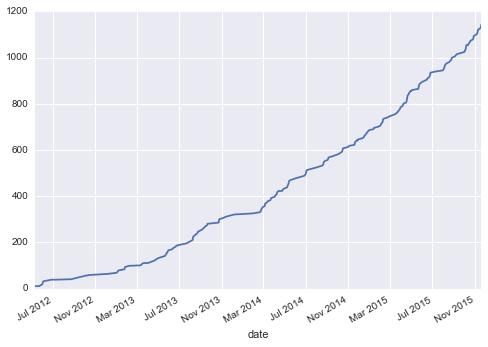

In [5]:
# plot!
%matplotlib inline
import seaborn as sns
df['running total'].plot()

### Machine learning

In [6]:
# create method to calculate difference between first date
from datetime import datetime
def getDayDiff(x):
    return (x - df.index[0]).days

In [7]:
# create date range for the next year (every 3 days)
next_year = pd.date_range("2015-11-25", "2016-11-25", freq="3D", closed="left")

# create difference in days from the oldest date in StackOverflow
next_year_diffs = [getDayDiff(day) for day in next_year]

In [8]:
# format data for machine learning
import numpy as np
next_year_diffs_for_pred = np.array(next_year_diffs).reshape(-1, 1)

In [9]:
# X will become days substracted from the first date in the Series
X = (df.index - df.index[0]).days.reshape(-1, 1)

# y are the actual values of reputation
y = df['running total']

# Create instance of regression model
from sklearn.linear_model import LinearRegression
lg = LinearRegression()
lg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Predict next year

In [10]:
# generate predictions
predictions = lg.predict(next_year_diffs_for_pred)

In [11]:
# create new data frame with future predictions
df_pred = pd.DataFrame({'date': next_year, 'running total': predictions})

# reset index
df_pred.set_index('date', inplace=True)

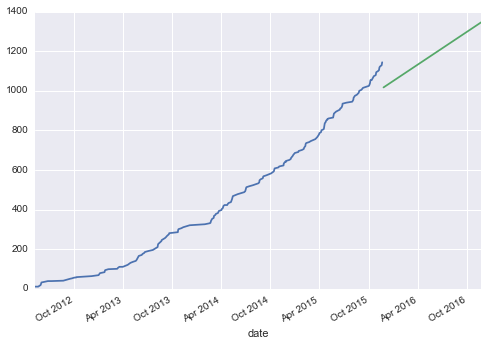

In [14]:
# plot current data and predicted data
df['running total'].plot()
df_pred['running total'].plot()

### Predict reputation in November 2016

In [12]:
# we can slice data by year and month
df_pred['2016-11']

,running total
date,
2016-11-01,1327.522865
2016-11-04,1330.245564
2016-11-07,1332.968263
2016-11-10,1335.690962
2016-11-13,1338.413661
2016-11-16,1341.136359
2016-11-19,1343.859058
2016-11-22,1346.581757
